In [1]:
include("simple_sn.jl")
using Main.SNetwork

In [2]:
import Statistics.mean

In [3]:
using PyPlot

In [4]:
nhidden = 20

20

In [5]:
xor_x = [0.2 0.2; 0.2 1.0; 1.0 0.2; 1.0 1.0]

4×2 Array{Float64,2}:
 0.2  0.2
 0.2  1.0
 1.0  0.2
 1.0  1.0

In [6]:
xor_y = [1.0 0.0; 0.0 1.0; 0.0 1.0; 1.0 0.0]

4×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
 0.0  1.0
 1.0  0.0

In [7]:
or_y = [1.0 0.0; 0.0 1.0; 0.0 1.0; 0.0 1.0]

4×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0
 0.0  1.0
 0.0  1.0

In [8]:
n1 = Network([2, nhidden, 2], 0.0, 1.0, 4)

Network(Dict(4 => [0; 0],2 => [0; 0; … ; 0; 0],3 => [0; 0],1 => [0; 0]), Dict(2 => [0 0 0 0; 0 0 0 0; … ; 0 0 0 0; 0 0 0 0],3 => [0 0 0 0; 0 0 0 0],1 => [0 0 0 0; 0 0 0 0]), Dict{Int64,Array{#s1,2} where #s1<:Real}(2 => [0.0; 0.0; … ; 0.0; 0.0],3 => [0.0; 0.0],1 => [-1.0; -1.0]), Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real}((1, 2) => [0.8798752105987673 -0.30057898067777583 … 0.7076790633485831 1.117299326410576; -0.43371447674206876 -0.0058116190504608 … -0.8028685564106934 0.9545900235525389],(2, 3) => [-0.4608015208674172 0.29119927135817114; -0.9976328392217807 -0.9832383512433858; … ; -0.5739321226688752 0.29262093855508414; 0.16092401714576068 -0.439677488234618]), [2, 20, 2], [0.0, 0.0], [0.0, 0.0], 3, [1.0, 1.0, 1.0], 0.0, false, 4, 0, 1000, 250, 0.0005, 0)

In [9]:
n1.thresholds[2] = 0.9
n1.thresholds[3] = 0.025 * nhidden

0.5

In [10]:
n1.soft_reset = true

true

In [11]:
n1.learn_rate

0.0005

In [12]:
l = train_loop(n1, xor_x, xor_y, 50, 150)

150-element Array{Float64,1}:
 0.08697955460143866   
 0.05155260066621258   
 0.3219074991669259    
 0.0117830015167572    
 0.06092392093872437   
 0.013387902988343298  
 0.004448221378067651  
 0.02023397044019281   
 0.19253610386437936   
 0.0041848601145273    
 0.036986192497232076  
 0.000992050384884403  
 0.006720192871156     
 ⋮                     
 0.004630122605011884  
 0.0005749751158194391 
 0.00013548451746114818
 0.0015502192918889267 
 0.0006815636072133849 
 0.0001686658155018657 
 1.2797163966967341e-5 
 0.003021031238981621  
 0.0004714541600393735 
 0.000322939111668721  
 0.0002201888409119256 
 0.0006130107957272343 

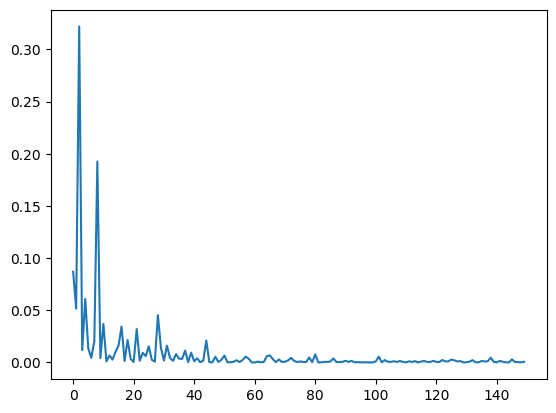

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5db5b8550>

In [13]:
plot(l)

In [14]:
fr = test(n1, xor_x, 2000)

4×2 Array{Float64,2}:
 0.0285  0.0045
 0.1485  0.455 
 0.0685  0.164 
 0.1635  0.0025

In [15]:
fr .* 500

4×2 Array{Float64,2}:
 14.25    2.25
 74.25  227.5 
 34.25   82.0 
 81.75    1.25

In [16]:
accuracy(fr, xor_y)

1.0

In [17]:
sampl = [accuracy(test(n1, xor_x, 2000), xor_y) for i in 1:100]

100-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [18]:
mean(sampl)

1.0